# CNN using keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
data = datasets.load_digits()

In [3]:
print(data)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [9]:
x = data["images"]

In [10]:
print(x.shape)

(1797, 8, 8)


In [11]:
y = data["target"]

In [12]:
print(y.shape)

(1797,)


label: 0


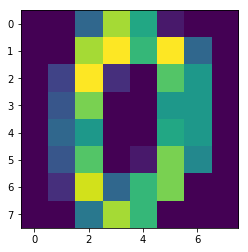

In [14]:
plt.imshow(x[0])
plt.plot()
print("label:", y[0])

In [16]:
y = to_categorical(y, num_classes = 10, dtype = int)

In [17]:
x = x.reshape((x.shape[0], x.shape[1], x.shape[2], 1))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [25]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Conv2D, Dense, Activation, MaxPooling2D, Flatten

In [26]:
model = Sequential()
model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), filters = 10, kernel_size = (3, 3), strides = (1, 1), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

In [28]:
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [29]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = adam)

In [30]:
history = model.fit(x_train, y_train, verbose = 2, epochs = 100, validation_split = 0.2, batch_size = 50)

Instructions for updating:
Use tf.cast instead.
Train on 1005 samples, validate on 252 samples
Epoch 1/100
 - 16s - loss: 2.5038 - acc: 0.2388 - val_loss: 1.6537 - val_acc: 0.4405
Epoch 2/100
 - 0s - loss: 1.3325 - acc: 0.5632 - val_loss: 1.1759 - val_acc: 0.6468
Epoch 3/100
 - 0s - loss: 0.9224 - acc: 0.7473 - val_loss: 0.8577 - val_acc: 0.7817
Epoch 4/100
 - 0s - loss: 0.6648 - acc: 0.8179 - val_loss: 0.6655 - val_acc: 0.8294
Epoch 5/100
 - 0s - loss: 0.5086 - acc: 0.8567 - val_loss: 0.5245 - val_acc: 0.8651
Epoch 6/100
 - 0s - loss: 0.3808 - acc: 0.9005 - val_loss: 0.4212 - val_acc: 0.8770
Epoch 7/100
 - 0s - loss: 0.3054 - acc: 0.9254 - val_loss: 0.3562 - val_acc: 0.9127
Epoch 8/100
 - 0s - loss: 0.2575 - acc: 0.9353 - val_loss: 0.2934 - val_acc: 0.9246
Epoch 9/100
 - 0s - loss: 0.2154 - acc: 0.9512 - val_loss: 0.2665 - val_acc: 0.9365
Epoch 10/100
 - 0s - loss: 0.1993 - acc: 0.9512 - val_loss: 0.2818 - val_acc: 0.9167
Epoch 11/100
 - 0s - loss: 0.1734 - acc: 0.9602 - val_loss: 0.2

Epoch 94/100
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0838 - val_acc: 0.9722
Epoch 95/100
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0846 - val_acc: 0.9722
Epoch 96/100
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0859 - val_acc: 0.9722
Epoch 97/100
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0829 - val_acc: 0.9762
Epoch 98/100
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0843 - val_acc: 0.9722
Epoch 99/100
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0841 - val_acc: 0.9762
Epoch 100/100
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0838 - val_acc: 0.9762


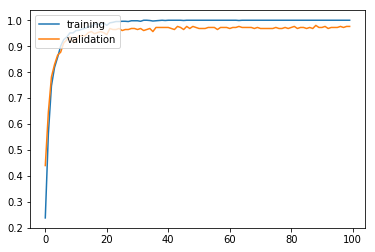

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [32]:
result = model.evaluate(x_test, y_test)
print("Test accuracy:", result[1])

540/540 [==============================] - 0s 813us/step
Test accuracy: 0.9796296305126614
